# Chapter 5: Random Variables, Probability, Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Random Variables
Let's simulate tossing a coin 10 times

In [2]:
coindomain = [0,1]
coinprob = [.5,.5]
np.random.choice(coindomain, size=10, replace=True, p= coinprob)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

Now, let's simulate rolling a die 15 times.

In [3]:
diedomain = range(1,7)
dieprob = np.repeat(1/6,6)
np.random.choice(diedomain, size=15, replace=True, p= dieprob)

array([4, 1, 5, 1, 2, 2, 3, 5, 5, 6, 3, 5, 5, 6, 2])

## Sample Size
Let's simulate 5 coin tosses, i.e. draw 5 sample values, and calculate the relative frequencies:

In [4]:
res1 = np.random.choice(coindomain, size=5, replace=True, p= coinprob)
pd.DataFrame(data=res1).value_counts(normalize=True)

0    0.8
1    0.2
dtype: float64

And now the same but with 1000 draws:

In [5]:
res1 = np.random.choice(coindomain, size=1000, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

0    0.525
1    0.475
dtype: float64

Repeat it one more time with a sample of 100,000:

In [6]:
res1 = np.random.choice(coindomain, size=100000, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

0    0.50328
1    0.49672
dtype: float64

Let's simulate with the die example, using sizes of 5, 1000, and 100000:

In [7]:
res2 = np.random.choice(diedomain, size=5, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

3    0.2
4    0.6
6    0.2
dtype: float64

In [8]:
res2 = np.random.choice(diedomain, size=1000, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

1    0.147
2    0.152
3    0.164
4    0.176
5    0.193
6    0.168
dtype: float64

In [9]:
res2 = np.random.choice(diedomain, size=100000, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

1    0.16836
2    0.16570
3    0.16834
4    0.16502
5    0.16410
6    0.16848
dtype: float64

## Empirical Distribution Functions

Replicate a simulating fucntion many times as much to get the empirical distribution:

In [28]:
coindomain = [0,1]
coinprob = [.5,.5]

def f1(coindomain, coinprob):
    y = np.random.choice(coindomain, size=50, replace=True, p= coinprob)
    return sum(y)

f1(coindomain, coinprob)

21

In [29]:
s1 = [f1(coindomain, coinprob) for _ in range(10000)]
edf1 = pd.DataFrame(data=s1).value_counts().sort_index(ascending=True)
edf1.div(10000)

12    0.0001
13    0.0003
14    0.0012
15    0.0015
16    0.0042
17    0.0084
18    0.0168
19    0.0256
20    0.0422
21    0.0547
22    0.0785
23    0.0896
24    0.1076
25    0.1140
26    0.1119
27    0.0929
28    0.0813
29    0.0616
30    0.0453
31    0.0253
32    0.0175
33    0.0104
34    0.0045
35    0.0032
36    0.0011
37    0.0001
38    0.0002
dtype: float64

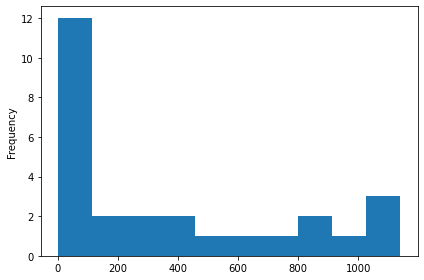

In [30]:
ax = edf1.plot.hist()
ax.get_figure().tight_layout()